### 1. Basic Pandas concepts

Pandas stands for “Python Data Analysis Library”. It is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

In [41]:
import pandas as pd # pandas provides indexing structure and data manipulation functionality

#### 1.1 Reading data
Remember that local python runs in memory. If you're on a Windows machine, you can open the task manager to the memory tab and then run the below section. You should see a big spike in your memory usage as the dataframe loads.

We recommend your data be in csv format if you're working with pandas. The `read_csv` function makes it really easy to read in data. File name is the only required argument.

In [32]:
campaign = pd.read_csv("c:/users/jadeg/Desktop/Marketing_camp/campaign.csv")

In [33]:
campaign.shape

(10022, 10)

#### 1.2 Examine the data

`.shape` is an *attribute* of a DataFrame object. This means it's a built-it in characteristic automatically available for all DataFrames.

Specifically, `.shape` shows the dimensions of the df as rows, columns. In python, rows are axis=0 and columns are axis=1.

In [4]:
campaign.shape

(10022, 10)

`.columns` shows the names of the columns in your dataframe.
You can tell *attributes* and *methods* apart because the latter requires `()`.

*Note:* .columns returns an index object, which does not have great formatting when displayed. Lists have better default formatting. As the name implies, `tolist()` converts the `columns` result to a list.

In [5]:
campaign.columns

Index(['user_id', 'date_served', 'marketing_channel', 'test_control',
       'converted', 'language_preferred', 'age_group', 'date_subscribed',
       'date_canceled', 'is_retained'],
      dtype='object')

`.head(n)` shows the first n rows of the dataframe. If you omit n, it will return the first 5 rows.

By default, ipython notebook shows 60 rows and 20 columns when you preview a pandas dataframe. To modify this default, use `pd.set_option()`, e.g. `pd.set_option("display.max_rows",100)` or `pd.set_option("display.max_columns",100)`

In [7]:
# look at the data
campaign.head(100)

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,1/1/2018,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,1/1/2018,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,1/1/2018,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,1/1/2018,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,1/1/2018,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
95,a100000104,1/5/2018,House Ads,control,True,English,0-18 years,1/5/2018,2/17/2018,False
96,a100000104,1/4/2018,House Ads,control,False,English,0-18 years,1/5/2018,2/17/2018,False
97,a100000105,1/5/2018,House Ads,control,True,English,19-24 years,1/5/2018,4/14/2018,False
98,a100000105,1/4/2018,House Ads,control,False,English,19-24 years,1/5/2018,4/14/2018,False


`.describe()` provides summary statistics for both numeric and non-numeric data.

In [9]:
# look at the summary info
campaign.describe()

,user_id,date_served,marketing_channel,test_control,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856
unique,7309,31,5,2,2,4,4,7,31,115,2
top,a100000882,1/15/2018,House Ads,control,False,English,English,19-24 years,1/16/2018,4/2/2018,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,1279


In [11]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10022 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   test_control        10022 non-null  object
 4   converted           10022 non-null  bool  
 5   language_preferred  10022 non-null  object
 6   age_group           10022 non-null  object
 7   date_subscribed     1856 non-null   object
 8   date_canceled       577 non-null    object
 9   is_retained         1856 non-null   object
dtypes: bool(1), object(9)
memory usage: 714.6+ KB


 **Use square brackets to select Dataframes**
 - single bracket give a Pandas Series
 - double bracket give a Pandas Dataframe

In [8]:
campaign['marketing_channel']

0        House Ads
1        House Ads
2        House Ads
3        House Ads
4        House Ads
           ...    
10017        Email
10018        Email
10019    Instagram
10020        Email
10021     Facebook
Name: marketing_channel, Length: 10022, dtype: object

In [9]:
campaign[["marketing_channel"]]

,marketing_channel
0,House Ads
1,House Ads
2,House Ads
3,House Ads
4,House Ads
...,...
10017,Email
10018,Email
10019,Instagram
10020,Email


Check **duplicate** records for primary key column
- think about why duplicates could happen?

In [10]:
len(campaign["user_id"])

10022

In [13]:
campaign['user_id']

0        a100000029
1        a100000030
2        a100000031
3        a100000032
4        a100000033
5        a100000034
6        a100000035
7        a100000036
8        a100000037
9        a100000038
10       a100000039
11       a100000040
12       a100000041
13       a100000042
14       a100000043
15       a100000044
16       a100000045
17       a100000046
18       a100000047
19       a100000048
20       a100000049
21       a100000050
22       a100000050
23       a100000051
24       a100000051
25       a100000052
26       a100000052
27       a100000053
28       a100000053
29       a100000054
            ...    
10007    a100007265
10008    a100007266
10009    a100007267
10010    a100007268
10011    a100007269
10012    a100007270
10013    a100007271
10014    a100007272
10015    a100007273
10016    a100007274
10017    a100007275
10018    a100007276
10019    a100007277
10020    a100007278
10021    a100007279
10022    a100007280
10023    a100007281
10024    a100007282
10025    a100007283


In [14]:
campaign["user_id"].unique()

array(['a100000029', 'a100000030', 'a100000031', ..., 'a100007292',
       'a100007293', 'a100007294'], dtype=object)

In [15]:
len(campaign["user_id"].unique())

7309

Use **DataFrame.nunique** to count distinct observations over requested axis (default is 0 for row-wise)

In [19]:
campaign["user_id"].nunique()

7309

For categorical fields or numeric fields with a small number of values, you can use `value_counts()` to see unique values and their frequency. 

In [22]:
campaign["marketing_channel"].value_counts()  # select marketing-channel, count(*) from campaign group by 1;

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

If you don't care about the frequency and just want an easily readable list of the values from a categorical field, use .unique()

In [20]:
campaign["marketing_channel"].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

In [21]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 11 columns):
user_id               10037 non-null object
date_served           10021 non-null object
marketing_channel     10022 non-null object
test_control          10037 non-null object
converted             10022 non-null object
language_displayed    10037 non-null object
language_preferred    10037 non-null object
age_group             10037 non-null object
date_subscribed       1856 non-null object
date_canceled         577 non-null object
is_retained           1856 non-null object
dtypes: object(11)
memory usage: 862.6+ KB


`.isnull()` is a method that returns true if values are null.

The code below:
1. Creates a boolean dataframe with True for null values and False for non-null values
2. Sums the number of True's by column (in python True=1 and False=0)

In [24]:
campaign.isnull()

,user_id,date_served,marketing_channel,test_control,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False


### Number of Missing records in each column:

In [23]:
campaign.isnull().sum()

user_id                  0
date_served             16
marketing_channel       15
test_control             0
converted               15
language_displayed       0
language_preferred       0
age_group                0
date_subscribed       8181
date_canceled         9460
is_retained           8181
dtype: int64

#### Practice 1
For the below exercise, we want you to use the techniques taught above to explore another dataset

Step 1. Create a dataframe called campaign_new from the csv file **campaign_new.csv**

Step 2 How many rows and columns does the data have?

Step 3 Display the top 10 records to explore the data

Step 4 Whether there are duplicates user_id - think about why there are duplicates

Step 5 How many users' MARKETING_CHANNEL are Facebook?

Step 6 How many users' MARKETING_CHANNEL are missing?

In [42]:
campaign_new=pd.read_csv("C:/Users/jadeg/Desktop/Marketing_camp/campaign_new.csv")

In [43]:
campaign_new.shape



(10037, 14)

In [44]:
campaign_new.head(10)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,is_retained,DoW,channel_code,is_correct_lang
0,a100000029,1/1/2018,House Ads,personalization,True,English,English,0-18 years,1/1/2018,NaN,True,0.0,1.0,Yes
1,a100000030,1/1/2018,House Ads,personalization,True,English,English,19-24 years,1/1/2018,NaN,True,0.0,1.0,Yes
2,a100000031,1/1/2018,House Ads,personalization,True,English,English,24-30 years,1/1/2018,NaN,True,0.0,1.0,Yes
3,a100000032,1/1/2018,House Ads,personalization,True,English,English,30-36 years,1/1/2018,NaN,True,0.0,1.0,Yes
4,a100000033,1/1/2018,House Ads,personalization,True,English,English,36-45 years,1/1/2018,NaN,True,0.0,1.0,Yes
5,a100000034,1/1/2018,House Ads,personalization,True,German,German,45-55 years,1/1/2018,NaN,True,0.0,1.0,Yes
6,a100000035,1/1/2018,House Ads,personalization,True,English,English,55+ years,1/1/2018,NaN,True,0.0,1.0,Yes
7,a100000036,1/1/2018,House Ads,personalization,True,English,English,0-18 years,1/1/2018,NaN,True,0.0,1.0,Yes
8,a100000037,1/1/2018,House Ads,personalization,True,English,English,19-24 years,1/1/2018,NaN,True,0.0,1.0,Yes
9,a100000038,1/1/2018,House Ads,personalization,True,English,English,24-30 years,1/1/2018,NaN,True,0.0,1.0,Yes


In [39]:
campaign_new['user_id'].nunique()

7309

In [45]:
campaign["marketing_channel"].value_counts()  # select marketing-channel, count(*) from campaign group by 1;                                         

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

### 2. Campaign result overview

**.Groupby**, similar to Group by in SQL, it lets you group data, which is very powerful for analysis. A few things to know:

.groupby() returns a groupby object which then needs to be aggregated with count, sum, mean, median etc.
By default, .groupby() turns the column you group on into the index for the grouped data
.groupby() excludes missings!
The format for .groupby() is dataframe.groupby("column to group on")["column to summarize"].summary_function(). Both the "column to group on" and the "column to summarize" arguments can take more than one column if you input them as a list.

Some summary functions:

sum(), mean(), median(), min(), count(), max()

#### 2.1 How many users receive marketing offers by day?

In [24]:
#Group by date_served
daily_users = campaign.groupby(['date_served'])['user_id'].nunique()

In [37]:
campaign.groupby(['date_served'])['user_id'].nunique() # select date_served, count(distinct user_id) from 
                                                      # campaign group by date_served;

date_served
1/1/2018     362
1/10/2018    337
1/11/2018    310
1/12/2018    301
1/13/2018    306
1/14/2018    305
1/15/2018    767
1/16/2018    388
1/17/2018    369
1/18/2018    318
1/19/2018    305
1/2/2018     374
1/20/2018    311
1/21/2018    229
1/22/2018    178
1/23/2018    172
1/24/2018    190
1/25/2018    184
1/26/2018    222
1/27/2018    320
1/28/2018    320
1/29/2018    319
1/3/2018     348
1/30/2018    317
1/31/2018    340
1/4/2018     323
1/5/2018     319
1/6/2018     308
1/7/2018     275
1/8/2018     312
1/9/2018     312
Name: user_id, dtype: int64

In [28]:
print(daily_users)

date_served
1/1/2018     362
1/10/2018    337
1/11/2018    310
1/12/2018    301
1/13/2018    306
1/14/2018    305
1/15/2018    767
1/16/2018    388
1/17/2018    369
1/18/2018    318
1/19/2018    305
1/2/2018     374
1/20/2018    311
1/21/2018    229
1/22/2018    178
1/23/2018    172
1/24/2018    190
1/25/2018    184
1/26/2018    222
1/27/2018    320
1/28/2018    320
1/29/2018    319
1/3/2018     348
1/30/2018    317
1/31/2018    340
1/4/2018     323
1/5/2018     319
1/6/2018     308
1/7/2018     275
1/8/2018     312
1/9/2018     312
Name: user_id, dtype: int64


DataFrame.nunique(): Count distinct observations over requested axis.  

Visualization in Python

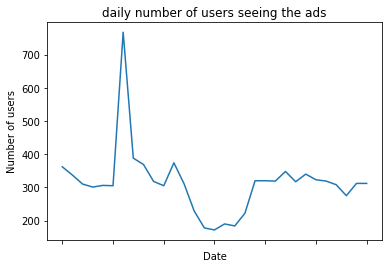

In [30]:
import matplotlib.pyplot as plt

# plot
daily_users.plot()

# annotate
plt.title('daily number of users seeing the ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.show()

#### Practice 2
What is the overall conversion rate? hint: use column 'converted'

#### 2.2 Common marketing metrics to evaluate campaign performance
- **Conversion rate** = Number of people who converted / Total number of people who received offers
- **Retention rate** = number of people who remained / Total number of people who converted

Filter in Pandas:

In [31]:
# Step one: create a boolean mask
campaign['is_retained']==True

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
10007     True
10008     True
10009     True
10010     True
10011     True
10012     True
10013     True
10014     True
10015     True
10016     True
10017     True
10018     True
10019     True
10020     True
10021     True
10022     True
10023     True
10024    False
10025    False
10026    False
10027    False
10028    False
10029    False
10030    False
10031    False
10032    False
10033     True
10034     True
10035     True
10036     True
Name: is_retained, Length: 10037, dtype: bool

In [32]:
# Step two: put the boolean mask into the dataframe
campaign.loc[campaign['is_retained']==True]    #select * from campaign where is_retained = True

,user_id,date_served,marketing_channel,test_control,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,1/1/2018,House Ads,personalization,True,English,English,0-18 years,1/1/2018,NaN,True
1,a100000030,1/1/2018,House Ads,personalization,True,English,English,19-24 years,1/1/2018,NaN,True
2,a100000031,1/1/2018,House Ads,personalization,True,English,English,24-30 years,1/1/2018,NaN,True
3,a100000032,1/1/2018,House Ads,personalization,True,English,English,30-36 years,1/1/2018,NaN,True
4,a100000033,1/1/2018,House Ads,personalization,True,English,English,36-45 years,1/1/2018,NaN,True
5,a100000034,1/1/2018,House Ads,personalization,True,German,German,45-55 years,1/1/2018,NaN,True
6,a100000035,1/1/2018,House Ads,personalization,True,English,English,55+ years,1/1/2018,NaN,True
7,a100000036,1/1/2018,House Ads,personalization,True,English,English,0-18 years,1/1/2018,NaN,True
8,a100000037,1/1/2018,House Ads,personalization,True,English,English,19-24 years,1/1/2018,NaN,True
9,a100000038,1/1/2018,House Ads,personalization,True,English,English,24-30 years,1/1/2018,NaN,True


In [33]:
retained = campaign.loc[campaign['is_retained']==True]['user_id'].nunique()

In [34]:
print(retained)

678


In [35]:
converted = campaign.loc[campaign['converted']==True]['user_id'].nunique()

In [49]:
converted = campaign.loc[campaign['converted']==True]

In [47]:
print(converted)

          user_id date_served marketing_channel     test_control  converted  \
0      a100000029    1/1/2018         House Ads  personalization       True   
1      a100000030    1/1/2018         House Ads  personalization       True   
2      a100000031    1/1/2018         House Ads  personalization       True   
3      a100000032    1/1/2018         House Ads  personalization       True   
4      a100000033    1/1/2018         House Ads  personalization       True   
...           ...         ...               ...              ...        ...   
10015  a100007288   1/17/2018             Email          control       True   
10016  a100007289   1/17/2018             Email          control       True   
10017  a100007290   1/17/2018             Email          control       True   
10018  a100007291   1/17/2018             Email          control       True   
10020  a100007293   1/17/2018             Email          control       True   

      language_preferred    age_group date_subscrib

In [37]:
retention_rate = retained / converted

In [38]:
print(round(retention_rate,2))

0.67


#### 2.3 Customer Segmentation analysis
 - Use segemetnation analysis to 
     - Analyze campaign performance by each segments
     - Target profitable segments for next campaign
     
 - Creating segmentation variables is the first step - usually this will happen in SQL

In [39]:
# Look at by marketing channel:
campaign.groupby(['marketing_channel'])['user_id'].nunique()

marketing_channel
Email         553
Facebook     1758
House Ads    3968
Instagram    1740
Push          972
Name: user_id, dtype: int64

In [40]:
# How many customers are converted in each marketing channel
campaign.loc[campaign['converted']==True].groupby(['marketing_channel'])['user_id'].nunique()

marketing_channel
Email        187
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

Conversion rate by channel

In [68]:
conversion_by_channel = campaign.loc[campaign['converted']==True].groupby(['marketing_channel'])['user_id'].nunique() / \
campaign.groupby(['marketing_channel'])['user_id'].nunique()

In [69]:
print(conversion_by_channel)

marketing_channel
Email        0.338156
Facebook     0.125711
House Ads    0.075101
Instagram    0.133333
Push         0.079218
Name: user_id, dtype: float64


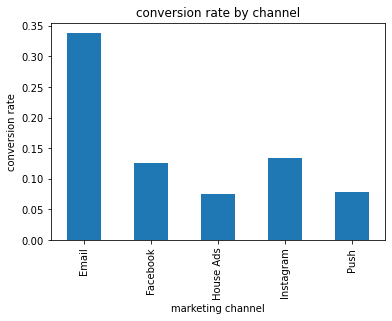

In [70]:
#plot conversion rate by channel:

import matplotlib.pyplot as plt

# plot
conversion_by_channel.plot(kind='bar')

# annotate
plt.title('conversion rate by channel')
plt.xlabel('marketing channel')
plt.ylabel('conversion rate')
plt.show()

#### Practice 3
What is the retention rate by each marketing channel?

##### 2.3.2 Customer Segmentation analysis by more than one segments

In [72]:
language_age_convert=campaign.loc[campaign['converted']==True].groupby(['language_preferred', 'age_group'])['user_id'].nunique()

In [73]:
print(language_age_convert)

language_preferred  age_group  
Arabic              0-18 years       4
                    19-24 years      2
                    24-30 years      8
                    36-45 years      1
                    45-55 years      3
                    55+ years        1
English             0-18 years     168
                    19-24 years    281
                    24-30 years    201
                    30-36 years     69
                    36-45 years     65
                    45-55 years     61
                    55+ years       66
German              0-18 years      13
                    19-24 years     14
                    24-30 years     17
                    30-36 years      3
                    36-45 years      4
                    45-55 years      6
                    55+ years        2
Spanish             0-18 years       7
                    19-24 years      6
                    24-30 years      2
                    30-36 years      5
                    36-45 years 

Unstack the result to a DataFrame, so that we can plot

In [74]:
language_age_convert.unstack(level=1)

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,4.0,2.0,8.0,NaN,1.0,3.0,1.0
English,168.0,281.0,201.0,69.0,65.0,61.0,66.0
German,13.0,14.0,17.0,3.0,4.0,6.0,2.0
Spanish,7.0,6.0,2.0,5.0,4.0,5.0,7.0


In [75]:
df_language_age_convert=pd.DataFrame(language_age_convert.unstack(level=1))

In [76]:
print(df_language_age_convert)

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                     4.0          2.0          8.0          NaN   
English                  168.0        281.0        201.0         69.0   
German                    13.0         14.0         17.0          3.0   
Spanish                    7.0          6.0          2.0          5.0   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                      1.0          3.0        1.0  
English                    65.0         61.0       66.0  
German                      4.0          6.0        2.0  
Spanish                     4.0          5.0        7.0  


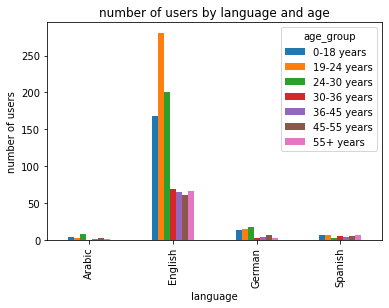

In [77]:
# plot
import matplotlib.pyplot as plt
df_language_age_convert.plot(kind='bar')

# annotate
plt.title('number of users by language and age')
plt.xlabel('language')
plt.ylabel('number of users')
plt.show()

#### Practice 4
Looking at the number of **converted users** by these 2 segments are not very informative.

Should we look at conversion rate by language and age?

### 3. A/B Testing

What is A/B testing:

- A/B testing, sometimes referred to as split testing, is the process of comparing two different marketing strategies to determine which one performs better
- Testing allows us to understand marketing impact

In a typical A/B testing setting, you would create and test two or more versions of marketing strategies for their effectiveness in achieving your marketing goal. Consider a case where your goal is to improve marketing email open rates. 

If your hypothesis is that email subject line B will result in higher open rates than email subject line A, then you would run an A/B test with these two subject lines. You will randomly select half of the users and send out marketing emails with subject line A. The other half of randomly selected users will receive emails with subject line B. You will run this test for a predetermined period of time (which could be one week, two weeks, or one month, for instance) or until a predetermined number of users receive the two versions of emails (which is a minimum of 1,000 users to receive each version of the subject line). Once your tests are complete, then you analyze and evaluate the experiment results. When analyzing the results, you will need to check whether there is a statistically significant difference between the results of the two versions.

In [79]:
from scipy import stats
import numpy as np

In [57]:
campaign['test_control'].value_counts()

control            5076
personalization    4946
Name: test_control, dtype: int64

In [59]:
# Let's only look at Email marketing channel
email = campaign.loc[campaign['marketing_channel'] == 'Email']

In [60]:
print(email)

          user_id date_served marketing_channel     test_control  converted  \
354    a100000526    1/1/2018             Email  personalization       True   
358    a100000530    1/5/2018             Email  personalization       True   
362    a100000534    1/9/2018             Email  personalization      False   
366    a100000538   1/13/2018             Email  personalization       True   
370    a100000542   1/17/2018             Email  personalization       True   
...           ...         ...               ...              ...        ...   
10015  a100007288   1/17/2018             Email          control       True   
10016  a100007289   1/17/2018             Email          control       True   
10017  a100007290   1/17/2018             Email          control       True   
10018  a100007291   1/17/2018             Email          control       True   
10020  a100007293   1/17/2018             Email          control       True   

      language_preferred    age_group date_subscrib

For email channel, there are the test groups which received personalization email and the control group which receive normal email

In [62]:
email.groupby(['test_control'])['user_id'].nunique()

test_control
control            270
personalization    284
Name: user_id, dtype: int64

In [80]:
# Let's compare the conversion rate between test and control group
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()

test_control
control             76
personalization    111
Name: user_id, dtype: int64

In [51]:
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()\
/email.groupby(['test_control'])['user_id'].nunique()

test_control
control            0.281481
personalization    0.390845
Name: user_id, dtype: float64

Calculate the lift:

(Test conversion rate - Control conversion rate) / Control converstion rate

In [53]:
(0.40-0.28)/0.28

0.4285714285714285